Scenario:

The world is switching gears so fast that even without us realising we have gradually moved from watching movies on television channels to streaming them online! Online streaming services are growing more than ever today and have paved the way for many other streaming providers to join the race. As the war between the online streaming platforms is getting intense, there is a handful of niche content in the entertainment and media industry, still out there, which has viewers looking for something that these big names such as Netflix, Disney or Amazon Prime are not offering.

Canopy is one such boutique streaming service that plans to cater to the viewers of French-language movies. Their initial business goals, as a streaming service provider, are:

- offer curated selections of best rated French-language movies from the existing content
- make French-language movies available to various age groups
- identify the least tapped genres so as to provide the filmmakers with data to make original content for Canopy.

You are appointed as the data analyst for Canopy. Your key responsibilities include:

- interpreting data, analysing results using the statistical techniques you learned throughout the course.
- helping gather insights and understand trends to make decisions by conducting data analysis using python.
- deducing results that Canopy can use to inform their business goals.

Canopy wants to find solutions to some broader business problems and here is a suggested approach:

- Load or import the datasets.
- Combine both the datasets.
- Handle the missing data and clean it.
- Find the top 20 movies in each genre that is available in the French language.
- Analyse the genre distribution in the French language movies.

[Note: Canopy doesn’t mind if you choose to include the French dubbed movies, at this stage.]

In [1]:
# Import the two datasets provided to conduct the analysis for Canopy.
# First import the python libraries required to import the files and work with the data.

import numpy as np
import pandas as pd

pd.read_csv('20220525_movieds.csv')

,Title,Year,Age,IMDb,Rotten Tomatoes,Directors,Genres,Country,Language,Runtime
0,Trigger Pals,1939,NaN,5.3,NaN,Sam Newfield,"Action,Adventure,Western",United States,English,59.0
1,One Way Astronaut: The Mars One Initiative,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Open Grave,2013,18+,6.2,18%,Gonzalo López-Gallego,"Horror,Mystery,Thriller","United States,Hungary",English,102.0
3,Metallica: Kill 'Em All to St. Anger - The Ult...,2006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Beyond the Pale,2014,NaN,7.4,NaN,Ja-Ann Wang,"Short,Drama",United States,English,11.0
...,...,...,...,...,...,...,...,...,...,...
15064,Holiday Rush,2019,7+,4.8,NaN,Leslie Small,"Comedy,Romance",United States,English,92.0
15065,Demolition Man,1993,18+,6.7,59%,Marco Brambilla,"Action,Sci-Fi,Thriller",United States,English,115.0
15066,Düğün Dernek 2: Sünnet,2015,13+,6.4,NaN,Selçuk Aydemir,Comedy,Turkey,Turkish,112.0
15067,Fanney Khan,2018,NaN,4.5,63%,Atul Manjrekar,"Comedy,Drama,Music",India,NaN,130.0


In [2]:
pd.read_csv('20220620_movie2ds.csv')

,ID,Title,Netflix,Hulu,Prime Video,Disney+
0,13825,The Jungle Book: Search for the Lost Treasure,0,0,1,0
1,15943,Vellaiya Irukiravan Poi Solla Maatan,0,0,1,0
2,6233,Hollows Grove,0,0,1,0
3,16194,Web of the Spider,0,0,1,0
4,7870,Life in Danger,0,0,1,0
...,...,...,...,...,...,...
15064,2358,Bonanza TV,0,0,1,0
15065,3672,Darra,1,0,0,0
15066,1902,Bennett's War,1,0,0,0
15067,6894,Is Paris Burning?,0,0,1,0


In [3]:
# Assign names to the files for ease of use.

movies = pd.read_csv('20220525_movieds.csv')
streamers = pd.read_csv('20220620_movie2ds.csv')

In [4]:
# Sort the two datasets by title to see if the same movies are used for each file, or do they differ?

movies.sort_values(by=["Title"])

,Title,Year,Age,IMDb,Rotten Tomatoes,Directors,Genres,Country,Language,Runtime
724,"""22"" A film about Veterans, Healthcare and Sui...",2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11397,#IMomSoHard Live,2019,18+,5.2,NaN,Brian Volk-Weiss,Comedy,United States,English,NaN
5677,#Rucker50,2016,NaN,5.3,NaN,Robert McCullough Jr.,Documentary,United States,English,56.0
13447,#Selfie,2014,NaN,6.1,NaN,Cristina Jacob,Comedy,Romania,Romanian,123.0
2811,#SquadGoals,2018,NaN,4.0,NaN,Danny J. Boyle,"Drama,Thriller",United States,English,90.0
...,...,...,...,...,...,...,...,...,...,...
7676,هجولة 2: المهمة الغامضة,2018,NaN,3.8,NaN,NaN,NaN,NaN,NaN,NaN
1233,जान तेरे नाम,1992,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN
8111,​Maj Rati ​​Keteki,2017,NaN,NaN,NaN,Santwana Bardoloi,Drama,India,Assamese,NaN
10064,审死官,1992,7+,6.9,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
streamers.sort_values(by=["Title"])

,ID,Title,Netflix,Hulu,Prime Video,Disney+
8666,32,"""22"" A film about Veterans, Healthcare and Sui...",0,0,1,0
10815,37,#IMomSoHard Live,0,0,1,0
9643,38,#LoveSwag,0,0,1,0
953,40,#Rucker50,1,0,0,0
2354,41,#Selfie,1,0,0,0
...,...,...,...,...,...,...
2376,31,‚ÄãMaj Rati ‚Äã‚ÄãKeteki,1,0,0,0
4835,43,‡§ú‡§æ‡§® ‡§§‡•á‡§∞‡•á ‡§®‡§æ‡§Æ,0,0,1,0
6386,46,√Ånima,1,0,0,0
5270,49,√Üon Flux,0,1,0,0


It appears that the two datasets contain different titles. Combining them will involve looking for matches in Title.
I will use a left join to form a new dataset that contains all of the information from both 'movies' and 'streamers' datasets.
The titles found in 'streamers' do not contain information regarding language or rating. The streamers dataset only shows which streaming services have the title available for their subscribers to view. We will be searching for untapped genres, including the movies that do not have a match in the 'movies' dataframe (which would occur with an outer join) provides no extra value to the discussion of the business goals for Canopy, as there will be no information regarding genres, ratings or languages for those titles.

In [6]:
canopy_data = pd.merge(movies, streamers, how = "left", on = "Title")

In [7]:
canopy_data.head(20)

,Title,Year,Age,IMDb,Rotten Tomatoes,Directors,Genres,Country,Language,Runtime,ID,Netflix,Hulu,Prime Video,Disney+
0,Trigger Pals,1939,NaN,5.3,NaN,Sam Newfield,"Action,Adventure,Western",United States,English,59.0,15592.0,0.0,0.0,1.0,0.0
1,One Way Astronaut: The Mars One Initiative,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Open Grave,2013,18+,6.2,18%,Gonzalo López-Gallego,"Horror,Mystery,Thriller","United States,Hungary",English,102.0,9730.0,0.0,0.0,1.0,0.0
3,Metallica: Kill 'Em All to St. Anger - The Ult...,2006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8681.0,0.0,0.0,1.0,0.0
4,Beyond the Pale,2014,NaN,7.4,NaN,Ja-Ann Wang,"Short,Drama",United States,English,11.0,1987.0,0.0,0.0,1.0,0.0
5,White Tiger,1996,13+,5.0,NaN,Karen Shakhnazarov,"Action,Adventure,Fantasy,War",Russia,"Russian,German",104.0,16377.0,0.0,0.0,1.0,0.0
6,Path to War,2002,16+,7.3,NaN,John Frankenheimer,"Biography,Drama,War",United States,English,165.0,NaN,NaN,NaN,NaN,NaN
7,Manderlay,2005,NaN,7.3,50%,Lars von Trier,Drama,"Denmark,Sweden,Netherlands,France,Germany,Unit...",English,139.0,8407.0,0.0,1.0,0.0,0.0
8,On the Black Hill,1988,NaN,6.4,NaN,Andrew Grieve,Drama,United Kingdom,English,117.0,NaN,NaN,NaN,NaN,NaN
9,True Love,2005,NaN,5.6,NaN,NaN,"Drama,Romance",Mexico,Spanish,60.0,15635.0,0.0,0.0,1.0,0.0


In [8]:
canopy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15069 entries, 0 to 15068
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Title            15069 non-null  object 
 1   Year             15069 non-null  int64  
 2   Age              6609 non-null   object 
 3   IMDb             14543 non-null  float64
 4   Rotten Tomatoes  4636 non-null   object 
 5   Directors        14396 non-null  object 
 6   Genres           14814 non-null  object 
 7   Country          14672 non-null  object 
 8   Language         14507 non-null  object 
 9   Runtime          14533 non-null  float64
 10  ID               13423 non-null  float64
 11  Netflix          13423 non-null  float64
 12  Hulu             13423 non-null  float64
 13  Prime Video      13423 non-null  float64
 14  Disney+          13423 non-null  float64
dtypes: float64(7), int64(1), object(7)
memory usage: 1.7+ MB


We have merged the two datasets, 'movies' (15,069 rows x 10 columns) and 'streamers' (15,069 rows x 6 columns) into one dataset, named 'canopy_data' containing 15069 rows and 15 columns.
The two datasets were merged in the 'Title' column. If a Title from the 'movies' dataset is matched with a title from the 'streamers' dataset the values from both are merged into one row in the new DataFrame 'canopy_data'. If there is no match the title is added to 'canopy_data' with the values accompanying it from the movies dataframe and the rest of the row as NaN.
We don't need the columns "Directors', 'Country' (as we are only interested in language options) and ID. It might be interesting to keep the Runtime data to see if there is a difference between the top rated and lower rated movies.

Movie Ratings:
One of the issues in this project is how to determine the rating of a movie, given we have two values to choose from: the 'IMDb' rating and the 'Rotten Tomatoes' rating. From the information provided in the class data above we can see that out of the 15,069 entries (including the header) IMDb has 14,543 non-null rows, whereas Rotten Tomatoes has 4,636. My assumption is that IMDb is more widely used, given that many more movies have ratings, and so the rating generated is an average of more reviews than those of Rotten Tomatoes, making IMDb a more reliable and accurate rating for the movies. In this project I will only consider the IMDb ratings when filtering entries by rating.

In [9]:
df = canopy_data.drop(columns = ["Directors", "Country", "ID" ])
df

,Title,Year,Age,IMDb,Rotten Tomatoes,Genres,Language,Runtime,Netflix,Hulu,Prime Video,Disney+
0,Trigger Pals,1939,NaN,5.3,NaN,"Action,Adventure,Western",English,59.0,0.0,0.0,1.0,0.0
1,One Way Astronaut: The Mars One Initiative,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Open Grave,2013,18+,6.2,18%,"Horror,Mystery,Thriller",English,102.0,0.0,0.0,1.0,0.0
3,Metallica: Kill 'Em All to St. Anger - The Ult...,2006,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0
4,Beyond the Pale,2014,NaN,7.4,NaN,"Short,Drama",English,11.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
15064,Holiday Rush,2019,7+,4.8,NaN,"Comedy,Romance",English,92.0,1.0,0.0,0.0,0.0
15065,Demolition Man,1993,18+,6.7,59%,"Action,Sci-Fi,Thriller",English,115.0,0.0,1.0,0.0,0.0
15066,Düğün Dernek 2: Sünnet,2015,13+,6.4,NaN,Comedy,Turkish,112.0,NaN,NaN,NaN,NaN
15067,Fanney Khan,2018,NaN,4.5,63%,"Comedy,Drama,Music",NaN,130.0,0.0,0.0,1.0,0.0


In [10]:
# We want to find the top 20 movies in each genre. The problem is that a film can have multiple genre classifications.

df.groupby(['Genres'])['IMDb'].nlargest(1)

# Produces a list of all the genres with the largest IMDb ratings for that genre, and the index number for the entry.
# With this genre classification there are 1794 genres.
# We need a way to be able to consider each individual genre.
# My first thought was to split the Genres column by the delimiter ',' but the lengths vary.
# Instead, I think it will be easier to "explode" the dataframe - creating a new entry for each genre of that movie.

Genres                                                     
Action                                                13543    7.3
Action,Adventure                                      13468    8.4
Action,Adventure,Biography                            13477    6.9
Action,Adventure,Biography,Drama,History              6330     8.0
Action,Adventure,Biography,Drama,History,Romance,War  8839     2.0
                                                              ... 
Western                                               10761    8.8
Western,Comedy                                        10846    4.4
Western,Horror                                        672      3.9
Western,Mystery                                       3081     6.3
Western,War                                           5595     5.2
Name: IMDb, Length: 1794, dtype: float64

In [11]:
# To separate the genres using the explode function the data type needs to be converted from str to list.
# I got the idea for the code to explode a list from :
# https://stackoverflow.com/questions/59022138/a-column-genre-in-movies-data-set-have-multiple-categories-in-each-row-how-can

df["Genres"] = df["Genres"].str.split(",")
df

,Title,Year,Age,IMDb,Rotten Tomatoes,Genres,Language,Runtime,Netflix,Hulu,Prime Video,Disney+
0,Trigger Pals,1939,NaN,5.3,NaN,"[Action, Adventure, Western]",English,59.0,0.0,0.0,1.0,0.0
1,One Way Astronaut: The Mars One Initiative,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Open Grave,2013,18+,6.2,18%,"[Horror, Mystery, Thriller]",English,102.0,0.0,0.0,1.0,0.0
3,Metallica: Kill 'Em All to St. Anger - The Ult...,2006,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0
4,Beyond the Pale,2014,NaN,7.4,NaN,"[Short, Drama]",English,11.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
15064,Holiday Rush,2019,7+,4.8,NaN,"[Comedy, Romance]",English,92.0,1.0,0.0,0.0,0.0
15065,Demolition Man,1993,18+,6.7,59%,"[Action, Sci-Fi, Thriller]",English,115.0,0.0,1.0,0.0,0.0
15066,Düğün Dernek 2: Sünnet,2015,13+,6.4,NaN,[Comedy],Turkish,112.0,NaN,NaN,NaN,NaN
15067,Fanney Khan,2018,NaN,4.5,63%,"[Comedy, Drama, Music]",NaN,130.0,0.0,0.0,1.0,0.0


In [12]:
# Then we explode the Genres column, allowing us to group by and sort for individual genres.

df1 = df.explode("Genres")
df1

,Title,Year,Age,IMDb,Rotten Tomatoes,Genres,Language,Runtime,Netflix,Hulu,Prime Video,Disney+
0,Trigger Pals,1939,NaN,5.3,NaN,Action,English,59.0,0.0,0.0,1.0,0.0
0,Trigger Pals,1939,NaN,5.3,NaN,Adventure,English,59.0,0.0,0.0,1.0,0.0
0,Trigger Pals,1939,NaN,5.3,NaN,Western,English,59.0,0.0,0.0,1.0,0.0
1,One Way Astronaut: The Mars One Initiative,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Open Grave,2013,18+,6.2,18%,Horror,English,102.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
15067,Fanney Khan,2018,NaN,4.5,63%,Drama,NaN,130.0,0.0,0.0,1.0,0.0
15067,Fanney Khan,2018,NaN,4.5,63%,Music,NaN,130.0,0.0,0.0,1.0,0.0
15068,Off Label,2013,NaN,5.2,50%,Documentary,English,80.0,0.0,0.0,1.0,0.0
15068,Off Label,2013,NaN,5.2,50%,Drama,English,80.0,0.0,0.0,1.0,0.0


In [13]:
# Now we have a much more manageable list of genres to deal with. Here, we can also see the highest IMDb rating for each genre.
# The output also displays the index number for the movie entry. We can see movie with index 876 has the highest IMDb rating in
# 4 separate genres: Action, Adventure, Sci-fi, and Thriller.

df_genres = df1.groupby(['Genres'])['IMDb'].nlargest(1)
df_genres

Genres            
Action       876      8.8
Adventure    876      8.8
Animation    6015     8.8
Biography    1286     9.0
Comedy       9408     9.3
Crime        396      8.7
Documentary  8456     9.3
Drama        9408     9.3
Family       3220     9.1
Fantasy      9408     9.3
Film-Noir    9474     8.4
Game-Show    8556     8.2
History      12873    9.1
Horror       6015     8.8
Music        13530    9.3
Musical      1394     8.7
Mystery      7604     8.6
News         1286     9.0
Reality-TV   13248    7.9
Romance      9408     9.3
Sci-Fi       876      8.8
Short        9363     8.8
Sport        8456     9.3
Talk-Show    9778     9.3
Thriller     876      8.8
War          12873    9.1
Western      10761    8.8
Name: IMDb, dtype: float64

In [14]:
df1.groupby(["Genres"])["Genres"].count()

Genres
Action         2379
Adventure      1583
Animation       646
Biography       732
Comedy         4188
Crime          1643
Documentary    2309
Drama          6459
Family         1368
Fantasy         993
Film-Noir        74
Game-Show         6
History         649
Horror         1983
Music           590
Musical         362
Mystery        1158
News             94
Reality-TV       18
Romance        2111
Sci-Fi         1084
Short           344
Sport           359
Talk-Show        16
Thriller       3012
War             484
Western         444
Name: Genres, dtype: int64

In [15]:
df1.groupby(['Language'])['IMDb'].nlargest(1)

Language                                   
Aboriginal,English                    8291     7.2
Aboriginal,Portuguese                 5194     6.8
Afrikaans                             2111     7.1
Afrikaans,English                     1704     6.6
Akan                                  3920     5.8
                                              ... 
Yiddish,English,Irish,Chinese,Hebrew  10838    6.3
Yiddish,English,Spanish               5233     6.5
Yoruba,English,Ibo,Hausa              195      5.6
Yoruba,Ibo,English                    13149    6.5
Zulu                                  14148    7.8
Name: IMDb, Length: 1017, dtype: float64

In [16]:
# As with the genre classification for each movie, many movies are available in more than one language. It seems impractical
# to explode the dataframe on the Language column as well as the Genres column. A more sensible solution seems to search for
# the substring 'French' in each row to find the films that are available in French. I got the idea for the code from:
# https://stackoverflow.com/questions/11350770/filter-pandas-dataframe-by-substring-criteria

df_french = df1[df1['Language'].str.contains("French")==True]
df_french

,Title,Year,Age,IMDb,Rotten Tomatoes,Genres,Language,Runtime,Netflix,Hulu,Prime Video,Disney+
31,Mystery of the Pink Dolphin,2015,NaN,7.1,NaN,Documentary,"French,English,Portuguese,Dutch",52.0,0.0,0.0,1.0,0.0
49,My Revolution,2016,NaN,3.5,NaN,Drama,French,80.0,0.0,0.0,1.0,0.0
54,The Story of the Twelve Apostles,1999,NaN,6.6,NaN,Documentary,"English,French,Spanish",26.0,0.0,0.0,1.0,0.0
54,The Story of the Twelve Apostles,1999,NaN,6.6,NaN,Short,"English,French,Spanish",26.0,0.0,0.0,1.0,0.0
78,Girl on a Bicycle,2013,18+,6.2,8%,Comedy,"English,French,German,Italian",101.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
15051,The Special Relationship,2010,16+,6.7,86%,History,"English,French",93.0,0.0,0.0,1.0,0.0
15058,The Decline,2020,NaN,5.9,NaN,Thriller,French,83.0,1.0,0.0,0.0,0.0
15060,Michael H. – Profession: Director,2013,13+,7.0,91%,Documentary,"German,French",92.0,NaN,NaN,NaN,NaN
15060,Michael H. – Profession: Director,2013,13+,7.0,91%,Biography,"German,French",92.0,NaN,NaN,NaN,NaN


In [17]:
# The above dataframe (df_french) lists all the movies available in French, exploded for genre.
# Now to see if all the same genres are available for movies with language French.

df_french.groupby(['Genres'])['IMDb'].nlargest(1)

Genres            
Action       876      8.8
Adventure    876      8.8
Animation    1928     8.6
Biography    8245     8.3
Comedy       1928     8.6
Crime        7604     8.6
Documentary  2898     8.6
Drama        917      8.6
Family       917      8.6
Fantasy      917      8.6
History      2898     8.6
Horror       7703     8.0
Music        6714     7.6
Musical      2824     8.5
Mystery      7604     8.6
News         2873     8.3
Romance      2237     8.2
Sci-Fi       876      8.8
Short        8084     7.3
Sport        6503     7.4
Thriller     876      8.8
War          2219     8.3
Western      12246    8.4
Name: IMDb, dtype: float64

In [18]:
# Notice the list is shorter than for all movies. Canopy may be missing opportunities from the genres not represented.
# With AI programs to dub movies it shouldn't be too hard to convert all movies to have a French version, depending on local
# laws and regulations.
# However, considering the brief for this project, Canopy would like to know the top 20 movies for each genre in French.

df_french.loc[df_french['Genres'] == 'Action'].sort_values(by="IMDb", ascending=False).head(20)

,Title,Year,Age,IMDb,Rotten Tomatoes,Genres,Language,Runtime,Netflix,Hulu,Prime Video,Disney+
876,Inception,2010,13+,8.8,87%,Action,"English,Japanese,French",148.0,1.0,0.0,0.0,0.0
6469,Kill Bill: Vol. 1,2003,18+,8.1,85%,Action,"English,Japanese,French",111.0,0.0,1.0,0.0,0.0
234,Tomorrow,2019,NaN,8.0,NaN,Action,"English,Japanese,French,Arabic",124.0,0.0,0.0,1.0,0.0
4182,The Incredibles,2004,7+,8.0,97%,Action,"English,French",115.0,0.0,0.0,0.0,1.0
6555,Mission: Impossible - Fallout,2018,13+,7.7,97%,Action,"English,French",147.0,0.0,1.0,1.0,0.0
2090,Captain America: The Winter Soldier,2014,13+,7.7,90%,Action,"English,French",136.0,0.0,0.0,0.0,1.0
11453,Pirates of the Caribbean: Dead Man's Chest,2006,13+,7.3,53%,Action,"English,Turkish,Greek,Mandarin,French",151.0,0.0,0.0,0.0,1.0
12403,Slugterra: Ghoul from Beyond,2014,NaN,7.3,NaN,Action,"English,French",44.0,0.0,0.0,1.0,0.0
3505,Southern Comfort,1981,18+,7.2,82%,Action,"English,French",106.0,0.0,0.0,1.0,0.0
11345,The Siege of Jadotville,2016,NaN,7.2,60%,Action,"English,Irish,French",108.0,1.0,0.0,0.0,0.0


In [19]:
df_french.loc[df_french['Genres'] == 'Adventure'].sort_values(by="IMDb", ascending=False).head(20)

,Title,Year,Age,IMDb,Rotten Tomatoes,Genres,Language,Runtime,Netflix,Hulu,Prime Video,Disney+
876,Inception,2010,13+,8.8,87%,Adventure,"English,Japanese,French",148.0,1.0,0.0,0.0,0.0
1928,Home,2009,NaN,8.6,NaN,Adventure,"English,French",94.0,0.0,0.0,1.0,0.0
2824,The Lion King,1994,all,8.5,93%,Adventure,"English,Xhosa,Zulu,French,Spanish",118.0,0.0,0.0,0.0,1.0
2219,Inglourious Basterds,2009,18+,8.3,89%,Adventure,"English,German,French,Italian",153.0,1.0,0.0,0.0,0.0
2682,Monty Python and the Holy Grail,1975,7+,8.2,97%,Adventure,"English,French,Latin",91.0,1.0,0.0,0.0,0.0
11057,Queen,2013,13+,8.2,86%,Adventure,"Hindi,English,French,Japanese,Dutch",146.0,0.0,0.0,1.0,0.0
234,Tomorrow,2019,NaN,8.0,NaN,Adventure,"English,Japanese,French,Arabic",124.0,0.0,0.0,1.0,0.0
4182,The Incredibles,2004,7+,8.0,97%,Adventure,"English,French",115.0,0.0,0.0,0.0,1.0
10208,Ratatouille,2007,all,8.0,96%,Adventure,"English,French",111.0,0.0,0.0,0.0,1.0
9955,Ernest & Celestine,2012,7+,7.9,97%,Adventure,"French,English",80.0,0.0,0.0,1.0,0.0


In [20]:
df_french.loc[df_french['Genres'] == 'Animation'].sort_values(by="IMDb", ascending=False).head(20)

,Title,Year,Age,IMDb,Rotten Tomatoes,Genres,Language,Runtime,Netflix,Hulu,Prime Video,Disney+
1928,Home,2009,NaN,8.6,NaN,Animation,"English,French",94.0,0.0,0.0,1.0,0.0
2824,The Lion King,1994,all,8.5,93%,Animation,"English,Xhosa,Zulu,French,Spanish",118.0,0.0,0.0,0.0,1.0
10208,Ratatouille,2007,all,8.0,96%,Animation,"English,French",111.0,0.0,0.0,0.0,1.0
4182,The Incredibles,2004,7+,8.0,97%,Animation,"English,French",115.0,0.0,0.0,0.0,1.0
9955,Ernest & Celestine,2012,7+,7.9,97%,Animation,"French,English",80.0,0.0,0.0,1.0,0.0
3437,My Life as a Zucchini,2016,13+,7.8,99%,Animation,"French,English",66.0,1.0,0.0,0.0,0.0
14071,Lupin the Third: The Castle of Cagliostro,1979,7+,7.7,94%,Animation,"Japanese,English,French",100.0,1.0,0.0,0.0,0.0
5788,Cold Case Hammarskjöld,2019,NaN,7.6,83%,Animation,"English,French,Swedish,Bemba,Danish",128.0,NaN,NaN,NaN,NaN
5415,I Lost My Body,2019,18+,7.6,96%,Animation,French,81.0,1.0,0.0,0.0,0.0
3488,Kirikou and the Sorceress,1998,NaN,7.5,96%,Animation,French,71.0,0.0,0.0,1.0,0.0


In [21]:
df_french.loc[df_french['Genres'] == 'Biography'].sort_values(by="IMDb", ascending=False).head(20)

,Title,Year,Age,IMDb,Rotten Tomatoes,Genres,Language,Runtime,Netflix,Hulu,Prime Video,Disney+
8245,Calamity Jane: Légende de l'Ouest,2014,NaN,8.3,NaN,Biography,"French,English",82.0,NaN,NaN,NaN,NaN
1807,McQueen,2018,18+,7.8,99%,Biography,"English,French",111.0,0.0,0.0,1.0,0.0
6386,The Theory of Everything,2014,13+,7.7,79%,Biography,"English,French",123.0,1.0,0.0,0.0,0.0
11841,The Social Network,2010,13+,7.7,96%,Biography,"English,French",120.0,NaN,NaN,NaN,NaN
7344,"What Happened, Miss Simone?",2015,NaN,7.6,89%,Biography,"English,French",101.0,1.0,0.0,0.0,0.0
14628,Franca: Chaos and Creation,2016,NaN,7.6,NaN,Biography,"Italian,English,French",80.0,1.0,0.0,0.0,0.0
3125,Diana Vreeland: The Eye Has to Travel,2012,13+,7.5,94%,Biography,"English,French,Italian",86.0,0.0,1.0,0.0,0.0
3630,All the Mornings of the World,1991,NaN,7.5,89%,Biography,French,115.0,0.0,0.0,1.0,0.0
8064,RBG,2018,7+,7.5,94%,Biography,"English,Italian,German,French",98.0,0.0,1.0,0.0,0.0
5263,Elizabeth,1998,18+,7.4,82%,Biography,"English,French",124.0,1.0,0.0,0.0,0.0


In [22]:
df_french.loc[df_french['Genres'] == 'Comedy'].sort_values(by="IMDb", ascending=False).head(20)

,Title,Year,Age,IMDb,Rotten Tomatoes,Genres,Language,Runtime,Netflix,Hulu,Prime Video,Disney+
1928,Home,2009,NaN,8.6,NaN,Comedy,"English,French",94.0,0.0,0.0,1.0,0.0
2682,Monty Python and the Holy Grail,1975,7+,8.2,97%,Comedy,"English,French,Latin",91.0,1.0,0.0,0.0,0.0
11057,Queen,2013,13+,8.2,86%,Comedy,"Hindi,English,French,Japanese,Dutch",146.0,0.0,0.0,1.0,0.0
10208,Ratatouille,2007,all,8.0,96%,Comedy,"English,French",111.0,0.0,0.0,0.0,1.0
6734,Groundhog Day,1993,7+,8.0,96%,Comedy,"English,French,Italian",101.0,1.0,0.0,0.0,0.0
5640,His Girl Friday,1940,7+,7.9,98%,Comedy,"English,French",92.0,0.0,0.0,1.0,0.0
2909,The Discreet Charm of the Bourgeoisie,1972,7+,7.9,98%,Comedy,"French,Spanish",102.0,0.0,0.0,1.0,0.0
9955,Ernest & Celestine,2012,7+,7.9,97%,Comedy,"French,English",80.0,0.0,0.0,1.0,0.0
10698,The Artist,2011,13+,7.9,95%,Comedy,"English,French",100.0,NaN,NaN,NaN,NaN
10971,Charade,1963,13+,7.9,94%,Comedy,"Spanish,English,French,German,Italian",113.0,0.0,0.0,1.0,0.0


In [23]:
df_french.loc[df_french['Genres'] == 'Crime'].sort_values(by="IMDb", ascending=False).head(20)

,Title,Year,Age,IMDb,Rotten Tomatoes,Genres,Language,Runtime,Netflix,Hulu,Prime Video,Disney+
7604,The Green Mile,1999,18+,8.6,78%,Crime,"English,French",189.0,0.0,1.0,0.0,0.0
6469,Kill Bill: Vol. 1,2003,18+,8.1,85%,Crime,"English,Japanese,French",111.0,0.0,1.0,0.0,0.0
7703,Diabolique,1955,NaN,8.0,96%,Crime,"French,English",117.0,0.0,0.0,1.0,0.0
9955,Ernest & Celestine,2012,7+,7.9,97%,Crime,"French,English",80.0,0.0,0.0,1.0,0.0
10771,The Hateful Eight,2015,18+,7.8,75%,Crime,"English,Spanish,French",168.0,1.0,0.0,0.0,0.0
2475,City of Ghosts,2017,18+,7.4,98%,Crime,"English,French,Khmer,Russian",116.0,0.0,0.0,1.0,0.0
3874,Notes on a Scandal,2006,18+,7.4,87%,Crime,"English,French",92.0,0.0,1.0,0.0,0.0
12142,Divines,2016,NaN,7.4,83%,Crime,French,105.0,1.0,0.0,0.0,0.0
13876,Atlantic City,1980,18+,7.3,100%,Crime,"English,French",104.0,0.0,0.0,1.0,0.0
2266,Murder on the Orient Express,1974,7+,7.3,89%,Crime,"English,French,German,Arabic",114.0,NaN,NaN,NaN,NaN


In [24]:
df_french.loc[df_french['Genres'] == 'Documentary'].sort_values(by="IMDb", ascending=False).head(20)

,Title,Year,Age,IMDb,Rotten Tomatoes,Genres,Language,Runtime,Netflix,Hulu,Prime Video,Disney+
2898,"Inner Worlds, Outer Worlds",2012,NaN,8.6,NaN,Documentary,"English,French,Spanish,German,Hindi,Polish",122.0,0.0,0.0,1.0,0.0
10693,Beyond the Summits,2009,NaN,8.5,NaN,Documentary,French,80.0,NaN,NaN,NaN,NaN
10469,The Weekend Sailor,2016,NaN,8.3,NaN,Documentary,"English,Spanish,French,Portuguese",73.0,0.0,0.0,1.0,0.0
8245,Calamity Jane: Légende de l'Ouest,2014,NaN,8.3,NaN,Documentary,"French,English",82.0,NaN,NaN,NaN,NaN
2873,Coexist,2010,NaN,8.3,NaN,Documentary,"Kinyarwanda,English,French",37.0,0.0,0.0,1.0,0.0
12766,Skydancers,2014,NaN,8.2,NaN,Documentary,"English,French",50.0,1.0,0.0,0.0,0.0
7547,Flakes & Flames,2013,NaN,8.2,NaN,Documentary,"English,French,German,Spanish",80.0,0.0,0.0,1.0,0.0
5667,Elles étaient en guerre (1914 - 1918),2014,NaN,8.0,NaN,Documentary,French,95.0,NaN,NaN,NaN,NaN
1807,McQueen,2018,18+,7.8,99%,Documentary,"English,French",111.0,0.0,0.0,1.0,0.0
3436,I Am Not Your Negro,2017,18+,7.8,99%,Documentary,"English,French",93.0,0.0,0.0,1.0,0.0


In [25]:
df_french.loc[df_french['Genres'] == 'Drama'].sort_values(by="IMDb", ascending=False).head(20)

,Title,Year,Age,IMDb,Rotten Tomatoes,Genres,Language,Runtime,Netflix,Hulu,Prime Video,Disney+
917,It's a Wonderful Life,1946,7+,8.6,94%,Drama,"English,French",130.0,0.0,0.0,1.0,0.0
7604,The Green Mile,1999,18+,8.6,78%,Drama,"English,French",189.0,0.0,1.0,0.0,0.0
2824,The Lion King,1994,all,8.5,93%,Drama,"English,Xhosa,Zulu,French,Spanish",118.0,0.0,0.0,0.0,1.0
12246,Django Unchained,2012,18+,8.4,87%,Drama,"English,German,French,Italian",165.0,1.0,0.0,0.0,0.0
2219,Inglourious Basterds,2009,18+,8.3,89%,Drama,"English,German,French,Italian",153.0,1.0,0.0,0.0,0.0
8245,Calamity Jane: Légende de l'Ouest,2014,NaN,8.3,NaN,Drama,"French,English",82.0,NaN,NaN,NaN,NaN
2237,Portrait of a Lady on Fire,2019,18+,8.2,98%,Drama,"French,Italian",122.0,0.0,1.0,0.0,0.0
11057,Queen,2013,13+,8.2,86%,Drama,"Hindi,English,French,Japanese,Dutch",146.0,0.0,0.0,1.0,0.0
7703,Diabolique,1955,NaN,8.0,96%,Drama,"French,English",117.0,0.0,0.0,1.0,0.0
13309,Magnolia,1999,18+,8.0,83%,Drama,"English,German,French",188.0,NaN,NaN,NaN,NaN


In [26]:
df_french.loc[df_french['Genres'] == 'Family'].sort_values(by="IMDb", ascending=False).head(20)

,Title,Year,Age,IMDb,Rotten Tomatoes,Genres,Language,Runtime,Netflix,Hulu,Prime Video,Disney+
917,It's a Wonderful Life,1946,7+,8.6,94%,Family,"English,French",130.0,0.0,0.0,1.0,0.0
1928,Home,2009,NaN,8.6,NaN,Family,"English,French",94.0,0.0,0.0,1.0,0.0
2824,The Lion King,1994,all,8.5,93%,Family,"English,Xhosa,Zulu,French,Spanish",118.0,0.0,0.0,0.0,1.0
4182,The Incredibles,2004,7+,8.0,97%,Family,"English,French",115.0,0.0,0.0,0.0,1.0
10208,Ratatouille,2007,all,8.0,96%,Family,"English,French",111.0,0.0,0.0,0.0,1.0
9955,Ernest & Celestine,2012,7+,7.9,97%,Family,"French,English",80.0,0.0,0.0,1.0,0.0
3437,My Life as a Zucchini,2016,13+,7.8,99%,Family,"French,English",66.0,1.0,0.0,0.0,0.0
14071,Lupin the Third: The Castle of Cagliostro,1979,7+,7.7,94%,Family,"Japanese,English,French",100.0,1.0,0.0,0.0,0.0
6985,A Town Called Panic,2009,7+,7.5,81%,Family,French,75.0,0.0,0.0,1.0,0.0
3488,Kirikou and the Sorceress,1998,NaN,7.5,96%,Family,French,71.0,0.0,0.0,1.0,0.0


In [27]:
df_french.loc[df_french['Genres'] == 'Fantasy'].sort_values(by="IMDb", ascending=False).head(20)

,Title,Year,Age,IMDb,Rotten Tomatoes,Genres,Language,Runtime,Netflix,Hulu,Prime Video,Disney+
7604,The Green Mile,1999,18+,8.6,78%,Fantasy,"English,French",189.0,0.0,1.0,0.0,0.0
917,It's a Wonderful Life,1946,7+,8.6,94%,Fantasy,"English,French",130.0,0.0,0.0,1.0,0.0
1928,Home,2009,NaN,8.6,NaN,Fantasy,"English,French",94.0,0.0,0.0,1.0,0.0
2682,Monty Python and the Holy Grail,1975,7+,8.2,97%,Fantasy,"English,French,Latin",91.0,1.0,0.0,0.0,0.0
10208,Ratatouille,2007,all,8.0,96%,Fantasy,"English,French",111.0,0.0,0.0,0.0,1.0
6734,Groundhog Day,1993,7+,8.0,96%,Fantasy,"English,French,Italian",101.0,1.0,0.0,0.0,0.0
9955,Ernest & Celestine,2012,7+,7.9,97%,Fantasy,"French,English",80.0,0.0,0.0,1.0,0.0
14071,Lupin the Third: The Castle of Cagliostro,1979,7+,7.7,94%,Fantasy,"Japanese,English,French",100.0,1.0,0.0,0.0,0.0
5415,I Lost My Body,2019,18+,7.6,96%,Fantasy,French,81.0,1.0,0.0,0.0,0.0
3488,Kirikou and the Sorceress,1998,NaN,7.5,96%,Fantasy,French,71.0,0.0,0.0,1.0,0.0


In [28]:
df_french.loc[df_french['Genres'] == 'History'].sort_values(by="IMDb", ascending=False).head(20)

,Title,Year,Age,IMDb,Rotten Tomatoes,Genres,Language,Runtime,Netflix,Hulu,Prime Video,Disney+
2898,"Inner Worlds, Outer Worlds",2012,NaN,8.6,NaN,History,"English,French,Spanish,German,Hindi,Polish",122.0,0.0,0.0,1.0,0.0
2873,Coexist,2010,NaN,8.3,NaN,History,"Kinyarwanda,English,French",37.0,0.0,0.0,1.0,0.0
7547,Flakes & Flames,2013,NaN,8.2,NaN,History,"English,French,German,Spanish",80.0,0.0,0.0,1.0,0.0
3013,And the Band Played On,1993,13+,7.8,100%,History,"English,French,Danish",141.0,0.0,0.0,1.0,0.0
14161,The Rape of Europa,2007,NaN,7.7,82%,History,"English,Russian,Polish,German,French,Italian",117.0,0.0,0.0,1.0,0.0
6714,Cold War,2018,18+,7.6,93%,History,"Polish,French,Croatian,German,Russian,Serbian,...",89.0,0.0,0.0,1.0,0.0
5788,Cold Case Hammarskjöld,2019,NaN,7.6,83%,History,"English,French,Swedish,Bemba,Danish",128.0,NaN,NaN,NaN,NaN
11664,Cyrano de Bergerac,1950,NaN,7.5,85%,History,French,137.0,0.0,0.0,1.0,0.0
1588,Frantz,2016,13+,7.5,91%,History,"French,German",113.0,0.0,0.0,1.0,0.0
3630,All the Mornings of the World,1991,NaN,7.5,89%,History,French,115.0,0.0,0.0,1.0,0.0


In [29]:
df_french.loc[df_french['Genres'] == 'Horror'].sort_values(by="IMDb", ascending=False).head(20)

,Title,Year,Age,IMDb,Rotten Tomatoes,Genres,Language,Runtime,Netflix,Hulu,Prime Video,Disney+
7703,Diabolique,1955,NaN,8.0,96%,Horror,"French,English",117.0,0.0,0.0,1.0,0.0
7241,Taste of Fear,1961,NaN,7.4,NaN,Horror,"English,French,German",81.0,0.0,0.0,1.0,0.0
8084,Kabala,2002,NaN,7.3,NaN,Horror,"French,English",26.0,0.0,0.0,1.0,0.0
3788,Images,1972,18+,7.1,69%,Horror,"English,French",104.0,0.0,0.0,1.0,0.0
4799,Climax,2018,18+,7.1,69%,Horror,"French,English",97.0,0.0,0.0,1.0,0.0
9896,The Little Girl Who Was Too Fond of Matches,2017,16+,7.0,86%,Horror,French,112.0,0.0,0.0,1.0,0.0
13212,The Killing of a Sacred Deer,2017,18+,7.0,79%,Horror,"English,French",121.0,1.0,0.0,0.0,0.0
12433,Suspiria,2018,18+,6.8,65%,Horror,"English,German,French,Russian",152.0,0.0,0.0,1.0,0.0
10770,Godspeed,2016,NaN,6.8,NaN,Horror,"English,French",94.0,0.0,0.0,1.0,0.0
12792,The Demons,2015,NaN,6.7,86%,Horror,French,118.0,0.0,0.0,1.0,0.0


In [30]:
df_french.groupby(['Genres'])['IMDb'].nlargest(1)

Genres            
Action       876      8.8
Adventure    876      8.8
Animation    1928     8.6
Biography    8245     8.3
Comedy       1928     8.6
Crime        7604     8.6
Documentary  2898     8.6
Drama        917      8.6
Family       917      8.6
Fantasy      917      8.6
History      2898     8.6
Horror       7703     8.0
Music        6714     7.6
Musical      2824     8.5
Mystery      7604     8.6
News         2873     8.3
Romance      2237     8.2
Sci-Fi       876      8.8
Short        8084     7.3
Sport        6503     7.4
Thriller     876      8.8
War          2219     8.3
Western      12246    8.4
Name: IMDb, dtype: float64

In [31]:
df_french.loc[df_french['Genres'] == 'Music'].sort_values(by="IMDb", ascending=False).head(20)

,Title,Year,Age,IMDb,Rotten Tomatoes,Genres,Language,Runtime,Netflix,Hulu,Prime Video,Disney+
6714,Cold War,2018,18+,7.6,93%,Music,"Polish,French,Croatian,German,Russian,Serbian,...",89.0,0.0,0.0,1.0,0.0
7344,"What Happened, Miss Simone?",2015,NaN,7.6,89%,Music,"English,French",101.0,1.0,0.0,0.0,0.0
3630,All the Mornings of the World,1991,NaN,7.5,89%,Music,French,115.0,0.0,0.0,1.0,0.0
2562,Playing for Time,1980,NaN,7.4,NaN,Music,"English,German,French",150.0,1.0,0.0,1.0,0.0
12215,Beauties of the Night,2016,NaN,7.3,NaN,Music,French,87.0,1.0,0.0,0.0,0.0
5689,Highly Strung,2016,NaN,7.2,100%,Music,French,96.0,1.0,0.0,0.0,0.0
10609,Etoiles: Dancers of the Paris Opera Ballet,2001,NaN,7.2,62%,Music,French,100.0,0.0,0.0,1.0,0.0
374,Chico & Rita,2010,NaN,7.2,87%,Music,"Spanish,English,French",94.0,0.0,0.0,1.0,0.0
3362,Coda,2013,NaN,7.2,NaN,Music,"English,French,German",96.0,0.0,0.0,1.0,0.0
4799,Climax,2018,18+,7.1,69%,Music,"French,English",97.0,0.0,0.0,1.0,0.0


In [32]:
df_french.loc[df_french['Genres'] == 'Musical'].sort_values(by="IMDb", ascending=False).head(20)

,Title,Year,Age,IMDb,Rotten Tomatoes,Genres,Language,Runtime,Netflix,Hulu,Prime Video,Disney+
2824,The Lion King,1994,all,8.5,93%,Musical,"English,Xhosa,Zulu,French,Spanish",118.0,0.0,0.0,0.0,1.0
9344,The Ballad of Buster Scruggs,2018,18+,7.3,91%,Musical,"English,French",133.0,1.0,0.0,0.0,0.0
984,The Great Mouse Detective,1986,all,7.2,79%,Musical,"English,French,German,Italian",74.0,0.0,0.0,0.0,1.0
6901,ZANZ,2018,NaN,7.2,NaN,Musical,"English,French",91.0,1.0,0.0,0.0,0.0
11431,The Princess and the Frog,2009,all,7.1,85%,Musical,"English,French",97.0,1.0,0.0,0.0,1.0
4677,Funny Face,1957,NaN,7.0,86%,Musical,"English,French",103.0,0.0,0.0,1.0,0.0
2466,Jersey Boys,2014,18+,6.8,51%,Musical,"English,Italian,French",134.0,1.0,0.0,0.0,0.0
14523,De-Lovely,2004,13+,6.6,48%,Musical,"English,French,Italian",125.0,0.0,0.0,1.0,0.0
4007,Millie,1931,NaN,6.3,NaN,Musical,"English,Spanish,French,German,Italian,Hebrew",138.0,0.0,0.0,1.0,0.0
4919,Babar: The Movie,1989,all,6.3,NaN,Musical,"English,French",70.0,NaN,NaN,NaN,NaN


In [33]:
df_french.loc[df_french['Genres'] == 'Mystery'].sort_values(by="IMDb", ascending=False).head(20)

,Title,Year,Age,IMDb,Rotten Tomatoes,Genres,Language,Runtime,Netflix,Hulu,Prime Video,Disney+
7604,The Green Mile,1999,18+,8.6,78%,Mystery,"English,French",189.0,0.0,1.0,0.0,0.0
7703,Diabolique,1955,NaN,8.0,96%,Mystery,"French,English",117.0,0.0,0.0,1.0,0.0
10971,Charade,1963,13+,7.9,94%,Mystery,"Spanish,English,French,German,Italian",113.0,0.0,0.0,1.0,0.0
9877,The Lady Vanishes,1938,NaN,7.8,NaN,Mystery,"English,German,French,Italian",96.0,0.0,0.0,1.0,0.0
10771,The Hateful Eight,2015,18+,7.8,75%,Mystery,"English,Spanish,French",168.0,1.0,0.0,0.0,0.0
14928,To Catch a Thief,1955,7+,7.4,96%,Mystery,"English,French",106.0,0.0,0.0,1.0,0.0
13291,Duelle,1976,NaN,7.3,NaN,Mystery,French,121.0,NaN,NaN,NaN,NaN
2266,Murder on the Orient Express,1974,7+,7.3,89%,Mystery,"English,French,German,Arabic",114.0,NaN,NaN,NaN,NaN
5747,Clue,1985,7+,7.3,62%,Mystery,"English,French",94.0,0.0,0.0,1.0,0.0
7657,April and the Extraordinary World,2015,7+,7.3,96%,Mystery,French,105.0,1.0,0.0,0.0,0.0


In [34]:
df_french.loc[df_french['Genres'] == 'News'].sort_values(by="IMDb", ascending=False).head(20)

,Title,Year,Age,IMDb,Rotten Tomatoes,Genres,Language,Runtime,Netflix,Hulu,Prime Video,Disney+
2873,Coexist,2010,NaN,8.3,NaN,News,"Kinyarwanda,English,French",37.0,0.0,0.0,1.0,0.0
14097,The Price We Pay,2014,NaN,7.3,89%,News,"English,French",93.0,0.0,0.0,1.0,0.0
8479,The Age of Stupid,2009,13+,7.0,73%,News,"English,French",92.0,0.0,0.0,1.0,0.0
2543,Incorruptible,2015,NaN,5.9,NaN,News,French,94.0,1.0,0.0,0.0,0.0


In [35]:
df_french.loc[df_french['Genres'] == 'Romance'].sort_values(by="IMDb", ascending=False).head(20)

,Title,Year,Age,IMDb,Rotten Tomatoes,Genres,Language,Runtime,Netflix,Hulu,Prime Video,Disney+
2237,Portrait of a Lady on Fire,2019,18+,8.2,98%,Romance,"French,Italian",122.0,0.0,1.0,0.0,0.0
6734,Groundhog Day,1993,7+,8.0,96%,Romance,"English,French,Italian",101.0,1.0,0.0,0.0,0.0
10698,The Artist,2011,13+,7.9,95%,Romance,"English,French",100.0,NaN,NaN,NaN,NaN
10971,Charade,1963,13+,7.9,94%,Romance,"Spanish,English,French,German,Italian",113.0,0.0,0.0,1.0,0.0
5640,His Girl Friday,1940,7+,7.9,98%,Romance,"English,French",92.0,0.0,0.0,1.0,0.0
9915,Masquerade,2012,NaN,7.8,100%,Romance,"English,French",91.0,0.0,0.0,1.0,0.0
3685,Eat Drink Man Woman,1994,13+,7.8,91%,Romance,"Mandarin,French",124.0,0.0,0.0,1.0,0.0
13280,Laurence Anyways,2012,13+,7.7,84%,Romance,"French,English,Latin",168.0,0.0,0.0,1.0,0.0
6386,The Theory of Everything,2014,13+,7.7,79%,Romance,"English,French",123.0,1.0,0.0,0.0,0.0
2149,Blue Is the Warmest Color,2013,18+,7.7,89%,Romance,"French,English",180.0,1.0,0.0,0.0,0.0


In [36]:
df_french.loc[df_french['Genres'] == 'Sci-Fi'].sort_values(by="IMDb", ascending=False).head(20)

,Title,Year,Age,IMDb,Rotten Tomatoes,Genres,Language,Runtime,Netflix,Hulu,Prime Video,Disney+
876,Inception,2010,13+,8.8,87%,Sci-Fi,"English,Japanese,French",148.0,1.0,0.0,0.0,0.0
1928,Home,2009,NaN,8.6,NaN,Sci-Fi,"English,French",94.0,0.0,0.0,1.0,0.0
234,Tomorrow,2019,NaN,8.0,NaN,Sci-Fi,"English,Japanese,French,Arabic",124.0,0.0,0.0,1.0,0.0
2090,Captain America: The Winter Soldier,2014,13+,7.7,90%,Sci-Fi,"English,French",136.0,0.0,0.0,0.0,1.0
7657,April and the Extraordinary World,2015,7+,7.3,96%,Sci-Fi,French,105.0,1.0,0.0,0.0,0.0
12403,Slugterra: Ghoul from Beyond,2014,NaN,7.3,NaN,Sci-Fi,"English,French",44.0,0.0,0.0,1.0,0.0
12181,The Matrix Reloaded,2003,18+,7.2,73%,Sci-Fi,"English,French",138.0,1.0,0.0,0.0,0.0
10596,The Lobster,2015,18+,7.2,87%,Sci-Fi,"English,French,Greek",119.0,1.0,0.0,0.0,0.0
4538,Iron Man 2,2010,13+,7.0,73%,Sci-Fi,"English,French,Russian",124.0,0.0,0.0,1.0,1.0
2880,Atlantis: The Lost Empire,2001,7+,6.9,49%,Sci-Fi,"English,French,Spanish",95.0,0.0,0.0,0.0,1.0


In [37]:
df_french.loc[df_french['Genres'] == 'Short'].sort_values(by="IMDb", ascending=False).head(20)

,Title,Year,Age,IMDb,Rotten Tomatoes,Genres,Language,Runtime,Netflix,Hulu,Prime Video,Disney+
8084,Kabala,2002,NaN,7.3,NaN,Short,"French,English",26.0,0.0,0.0,1.0,0.0
943,Lipsett Diaries,2010,NaN,7.2,NaN,Short,French,14.0,0.0,0.0,1.0,0.0
693,The Sand Castle,1977,NaN,7.0,NaN,Short,"French,English",13.0,0.0,0.0,1.0,0.0
9282,A Summer Dress,1996,NaN,7.0,NaN,Short,French,15.0,0.0,0.0,1.0,0.0
54,The Story of the Twelve Apostles,1999,NaN,6.6,NaN,Short,"English,French,Spanish",26.0,0.0,0.0,1.0,0.0
2247,Lifever,2013,NaN,6.1,NaN,Short,French,14.0,0.0,0.0,1.0,0.0


In [38]:
df_french.loc[df_french['Genres'] == 'Sport'].sort_values(by="IMDb", ascending=False).head(20)

,Title,Year,Age,IMDb,Rotten Tomatoes,Genres,Language,Runtime,Netflix,Hulu,Prime Video,Disney+
6503,The Short Game,2013,7+,7.4,84%,Sport,"English,French",99.0,1.0,0.0,0.0,0.0
10614,Pantani: The Accidental Death of a Cyclist,2014,7+,7.0,84%,Sport,"English,French,Italian",96.0,0.0,0.0,1.0,0.0
9122,The Cutting Edge,1992,7+,6.9,56%,Sport,"English,French,Russian",101.0,0.0,0.0,1.0,0.0
14253,Borg vs McEnroe,2017,18+,6.9,84%,Sport,"English,Swedish,French,Spanish,German",107.0,0.0,1.0,0.0,0.0
3767,Goon,2012,18+,6.8,81%,Sport,"English,French",92.0,1.0,0.0,0.0,0.0
12939,Bleed for This,2016,18+,6.8,69%,Sport,"English,French",117.0,1.0,0.0,0.0,0.0
8402,1:54,2016,NaN,6.6,57%,Sport,French,106.0,0.0,0.0,1.0,0.0
4373,Sparring,2017,NaN,6.2,NaN,Sport,French,95.0,1.0,0.0,0.0,0.0
12795,Cars 2,2011,all,6.1,39%,Sport,"English,Japanese,Italian,French",106.0,0.0,0.0,0.0,1.0
5704,Herbie Goes to Monte Carlo,1977,all,5.7,60%,Sport,"English,French",105.0,NaN,NaN,NaN,NaN


In [39]:
df_french.loc[df_french['Genres'] == 'Thriller'].sort_values(by="IMDb", ascending=False).head(20)

,Title,Year,Age,IMDb,Rotten Tomatoes,Genres,Language,Runtime,Netflix,Hulu,Prime Video,Disney+
876,Inception,2010,13+,8.8,87%,Thriller,"English,Japanese,French",148.0,1.0,0.0,0.0,0.0
6469,Kill Bill: Vol. 1,2003,18+,8.1,85%,Thriller,"English,Japanese,French",111.0,0.0,1.0,0.0,0.0
7703,Diabolique,1955,NaN,8.0,96%,Thriller,"French,English",117.0,0.0,0.0,1.0,0.0
234,Tomorrow,2019,NaN,8.0,NaN,Thriller,"English,Japanese,French,Arabic",124.0,0.0,0.0,1.0,0.0
10971,Charade,1963,13+,7.9,94%,Thriller,"Spanish,English,French,German,Italian",113.0,0.0,0.0,1.0,0.0
10771,The Hateful Eight,2015,18+,7.8,75%,Thriller,"English,Spanish,French",168.0,1.0,0.0,0.0,0.0
9915,Masquerade,2012,NaN,7.8,100%,Thriller,"English,French",91.0,0.0,0.0,1.0,0.0
9877,The Lady Vanishes,1938,NaN,7.8,NaN,Thriller,"English,German,French,Italian",96.0,0.0,0.0,1.0,0.0
2090,Captain America: The Winter Soldier,2014,13+,7.7,90%,Thriller,"English,French",136.0,0.0,0.0,0.0,1.0
6555,Mission: Impossible - Fallout,2018,13+,7.7,97%,Thriller,"English,French",147.0,0.0,1.0,1.0,0.0


In [40]:
df_french.loc[df_french['Genres'] == 'War'].sort_values(by="IMDb", ascending=False).head(20)

,Title,Year,Age,IMDb,Rotten Tomatoes,Genres,Language,Runtime,Netflix,Hulu,Prime Video,Disney+
2219,Inglourious Basterds,2009,18+,8.3,89%,War,"English,German,French,Italian",153.0,1.0,0.0,0.0,0.0
2873,Coexist,2010,NaN,8.3,NaN,War,"Kinyarwanda,English,French",37.0,0.0,0.0,1.0,0.0
14161,The Rape of Europa,2007,NaN,7.7,82%,War,"English,Russian,Polish,German,French,Italian",117.0,0.0,0.0,1.0,0.0
10837,The Savior,2014,NaN,7.6,NaN,War,French,105.0,0.0,0.0,1.0,0.0
9822,Sarah's Key,2010,13+,7.5,72%,War,"French,English,Italian,German,Yiddish",111.0,1.0,0.0,0.0,0.0
1588,Frantz,2016,13+,7.5,91%,War,"French,German",113.0,0.0,0.0,1.0,0.0
2780,The Guernsey Literary & Potato Peel Pie Society,2018,NaN,7.4,81%,War,"English,German,French",124.0,1.0,0.0,0.0,0.0
10639,Savior,1998,18+,7.3,56%,War,"English,Serbian,French",103.0,0.0,0.0,1.0,0.0
122,Nicholas and Alexandra,1971,7+,7.2,67%,War,"English,French,German,Russian",183.0,0.0,0.0,1.0,0.0
9564,Lumumba,2000,NaN,7.2,81%,War,"French,Lingala,English",115.0,0.0,0.0,1.0,0.0


In [41]:
df_french.loc[df_french['Genres'] == 'Western'].sort_values(by="IMDb", ascending=False).head(20)

,Title,Year,Age,IMDb,Rotten Tomatoes,Genres,Language,Runtime,Netflix,Hulu,Prime Video,Disney+
12246,Django Unchained,2012,18+,8.4,87%,Western,"English,German,French,Italian",165.0,1.0,0.0,0.0,0.0
8245,Calamity Jane: Légende de l'Ouest,2014,NaN,8.3,NaN,Western,"French,English",82.0,NaN,NaN,NaN,NaN
10771,The Hateful Eight,2015,18+,7.8,75%,Western,"English,Spanish,French",168.0,1.0,0.0,0.0,0.0
9344,The Ballad of Buster Scruggs,2018,18+,7.3,91%,Western,"English,French",133.0,1.0,0.0,0.0,0.0
2790,Cemetery Without Crosses,1969,NaN,6.9,NaN,Western,"French,Italian,Spanish",90.0,0.0,0.0,1.0,0.0
6395,Slow West,2015,18+,6.9,92%,Western,"English,French",84.0,1.0,0.0,0.0,0.0
4696,Django,2017,13+,6.3,61%,Western,"English,German,French,Italian",165.0,0.0,0.0,1.0,0.0
9473,Around the World in 80 Days,2004,7+,5.9,32%,Western,"English,Cantonese,French,German,Hindi,Turkish",120.0,0.0,0.0,0.0,1.0
7191,Luke and Lucy: The Texas Rangers,2009,7+,5.6,NaN,Western,"Flemish,Dutch,English,French",80.0,0.0,0.0,1.0,0.0
3155,Mohawk,2018,NaN,4.5,84%,Western,"English,Mohawk,French",91.0,1.0,0.0,0.0,0.0


In [42]:
# From the tables above we can see that not every genre represented in French has at least 20 movies for viewing.
# To see the distribution of Genres represented in French, we use the groupby function and the count function, as follows:

df_french.groupby(["Genres"])['Genres'].count()

Genres
Action         101
Adventure       96
Animation       42
Biography       60
Comedy         171
Crime           83
Documentary    103
Drama          427
Family          63
Fantasy         57
History         64
Horror          44
Music           29
Musical         19
Mystery         74
News             4
Romance        156
Sci-Fi          37
Short            6
Sport           12
Thriller       159
War             54
Western         10
Name: Genres, dtype: int64

<Axes: xlabel='Genres'>

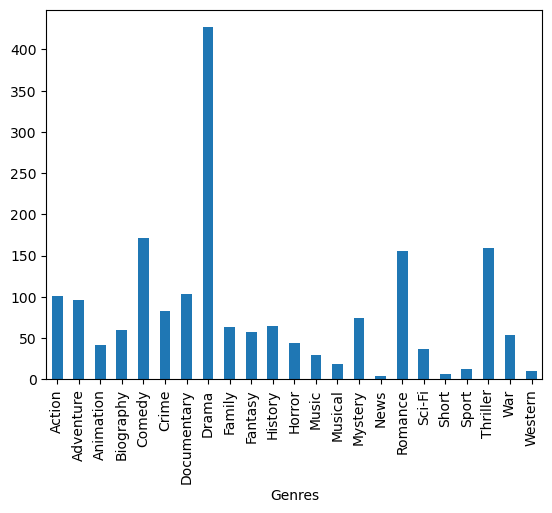

In [43]:
# It is obvious that there is great variation in the distribution of genres. To see this visually:
# The idea for this code came from:
# https://www.statology.org/pandas-groupby-plot/

df_french.groupby(["Genres"])['Genres'].count().plot(kind='bar')

<Axes: xlabel='Genres'>

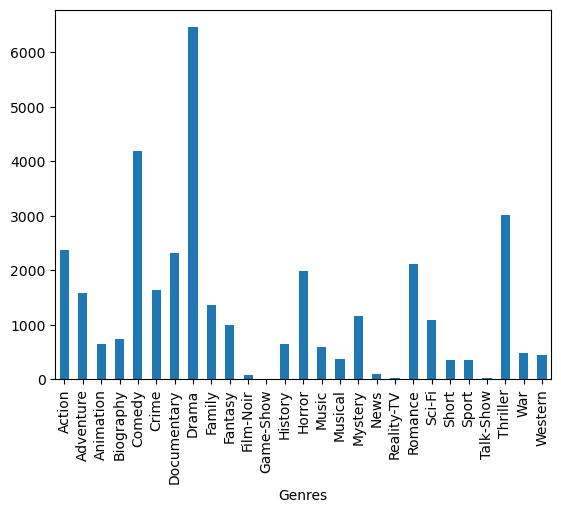

In [55]:
# Compare this with the genre distribution for all movies:

df1.groupby(["Genres"])['Genres'].count().plot(kind='bar')

In [45]:
# The genre distributions appear to be very similar in shape, indicating that the French-language movies are available in
# roughly the same proportion by genre as the whole movie dataset. The exception to this is Horror movies. Horror movies seem
# to be under represented in French-language movies. Horror stands out against surrounding genres in the ALL movie dataset, 
# yet is lower than History in the French-language movie graph.
# Films in the genres Film-Noir, Game-Show, Reality-TV, and Talk-Show are not available in French in the lists provided.

Revisiting the initial business goals of Canopy:

- offer curated selections of best rated French-language movies from the existing content
- make French-language movies available to various age groups
- identify the least tapped genres so as to provide the filmmakers with data to make original content for Canopy.

So far, we have merged the two datasets supplied, and filtered the data to find the movies available in French language. We used the IMDb rating system to identify the top movies in each Genre. A list of up to the top 20 movies available for each genre in French was produced.
This goes towards satisfying the goal of offering curated selections of best-rated French language movies from the existing content. Canopy now has lists of the top movies in each genre to offer to their subscribers.

For the second listed business goal, consider the non-null count for the merged dataset including all movies. We can see that the Age column has 6609 (out of 15069) non-null entries (about 44%). To get an accurate comparison for the French-language movies we need to sort for French prior to exploding the dataset by Genres.

In [70]:
canopy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15069 entries, 0 to 15068
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Title            15069 non-null  object 
 1   Year             15069 non-null  int64  
 2   Age              6609 non-null   object 
 3   IMDb             14543 non-null  float64
 4   Rotten Tomatoes  4636 non-null   object 
 5   Directors        14396 non-null  object 
 6   Genres           14814 non-null  object 
 7   Country          14672 non-null  object 
 8   Language         14507 non-null  object 
 9   Runtime          14533 non-null  float64
 10  ID               13423 non-null  float64
 11  Netflix          13423 non-null  float64
 12  Hulu             13423 non-null  float64
 13  Prime Video      13423 non-null  float64
 14  Disney+          13423 non-null  float64
dtypes: float64(7), int64(1), object(7)
memory usage: 1.7+ MB


In [71]:
df_frenchage = canopy_data[canopy_data['Language'].str.contains("French")==True]
df_frenchage

,Title,Year,Age,IMDb,Rotten Tomatoes,Directors,Genres,Country,Language,Runtime,ID,Netflix,Hulu,Prime Video,Disney+
31,Mystery of the Pink Dolphin,2015,NaN,7.1,NaN,Eric Ellena,Documentary,"France,Brazil","French,English,Portuguese,Dutch",52.0,9219.0,0.0,0.0,1.0,0.0
49,My Revolution,2016,NaN,3.5,NaN,Ramzi Ben Sliman,Drama,France,French,80.0,9193.0,0.0,0.0,1.0,0.0
54,The Story of the Twelve Apostles,1999,NaN,6.6,NaN,Yanai Arfi,"Documentary,Short",United States,"English,French,Spanish",26.0,14854.0,0.0,0.0,1.0,0.0
78,Girl on a Bicycle,2013,18+,6.2,8%,Jeremy Leven,"Comedy,Drama,Romance","Germany,France","English,French,German,Italian",101.0,5524.0,0.0,0.0,1.0,0.0
109,Razzia,2018,NaN,6.2,44%,Rose Bosch,"Drama,History,War","France,Germany,Hungary","French,German,Yiddish",115.0,10555.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15043,Among Dead Men,2008,18+,4.0,NaN,James Richards,"Action,Crime,Horror,Mystery,Sport",Australia,"English,French,Spanish",94.0,1089.0,0.0,0.0,1.0,0.0
15051,The Special Relationship,2010,16+,6.7,86%,Richard Loncraine,"Biography,Drama,History","United Kingdom,United States","English,French",93.0,14816.0,0.0,0.0,1.0,0.0
15058,The Decline,2020,NaN,5.9,NaN,Patrice Laliberté,Thriller,Canada,French,83.0,13181.0,1.0,0.0,0.0,0.0
15060,Michael H. – Profession: Director,2013,13+,7.0,91%,Yves Montmayeur,"Documentary,Biography","Austria,France","German,French",92.0,NaN,NaN,NaN,NaN,NaN


In [72]:
df_frenchage.info()

<class 'pandas.core.frame.DataFrame'>
Index: 717 entries, 31 to 15063
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Title            717 non-null    object 
 1   Year             717 non-null    int64  
 2   Age              343 non-null    object 
 3   IMDb             704 non-null    float64
 4   Rotten Tomatoes  398 non-null    object 
 5   Directors        709 non-null    object 
 6   Genres           717 non-null    object 
 7   Country          717 non-null    object 
 8   Language         717 non-null    object 
 9   Runtime          713 non-null    float64
 10  ID               638 non-null    float64
 11  Netflix          638 non-null    float64
 12  Hulu             638 non-null    float64
 13  Prime Video      638 non-null    float64
 14  Disney+          638 non-null    float64
dtypes: float64(7), int64(1), object(7)
memory usage: 89.6+ KB


Here, we see that there are only 717 movies available in French, out of 15069, just under 5%.
Of the 717 entries there are 343 non-null, almost 48%, slightly higher than the 44% of the entire movie dataset.
To ensure that Canopy is reaching its business goal of making French-language movies available to various age groups it is important to capture the data that demonstrates the actual result.
Considering the movies that have data for movie Age guide, we can see that there are movies available to various age groups.

In [73]:
df_frenchage.groupby(["Age"])['Age'].count()

Age
13+     73
16+     13
18+    164
7+      66
all     27
Name: Age, dtype: int64

In [74]:
canopy_data.groupby(["Age"])['Age'].count()

Age
13+    1119
16+     294
18+    3124
7+     1333
all     739
Name: Age, dtype: int64

In [75]:
data = {'Age': ['all', '7+', '13+', '16+', '18+'], 
        'All Movies': [739, 1333, 1119, 294, 3124]}
df_agepercent = pd.DataFrame(data)

# calculate percentage and create new column
 
total_all = df_agepercent['All Movies'].sum()
df_agepercent['All_Percentage'] = df_agepercent['All Movies'] / total_all * 100

df_agepercent

,Age,All Movies,All_Percentage
0,all,739,11.181722
1,7+,1333,20.169466
2,13+,1119,16.931457
3,16+,294,4.448479
4,18+,3124,47.268876


In [76]:
datafr = {'Age': ['all', '7+', '13+', '16+', '18+'], 
        'French Movies': [27, 66, 73, 13, 164]}
df_agepcfr = pd.DataFrame(datafr)

# calculate percentage and create new column
 
total_fr = df_agepcfr['French Movies'].sum()
df_agepcfr['French_Percentage'] = df_agepcfr['French Movies'] / total_fr * 100

df_agepcfr

,Age,French Movies,French_Percentage
0,all,27,7.871720
1,7+,66,19.241983
2,13+,73,21.282799
3,16+,13,3.790087
4,18+,164,47.813411


From the two dataframes above, df_agepercent and df_agepcfr we can see that the distribution of movies available to the various age groups is similar for both sets of data, all movies and french language movies.

To get a visual representation of the distributions of movies by age range:
- merge the two dataframes on the Age column
- drop the two count columns, keeping only the percentage values columns
- plot the dataset as a bar graph

In [77]:
combined = pd.merge(df_agepercent, df_agepcfr, on = 'Age').drop(['All Movies', 'French Movies'], axis =1)
combined

,Age,All_Percentage,French_Percentage
0,all,11.181722,7.871720
1,7+,20.169466,19.241983
2,13+,16.931457,21.282799
3,16+,4.448479,3.790087
4,18+,47.268876,47.813411


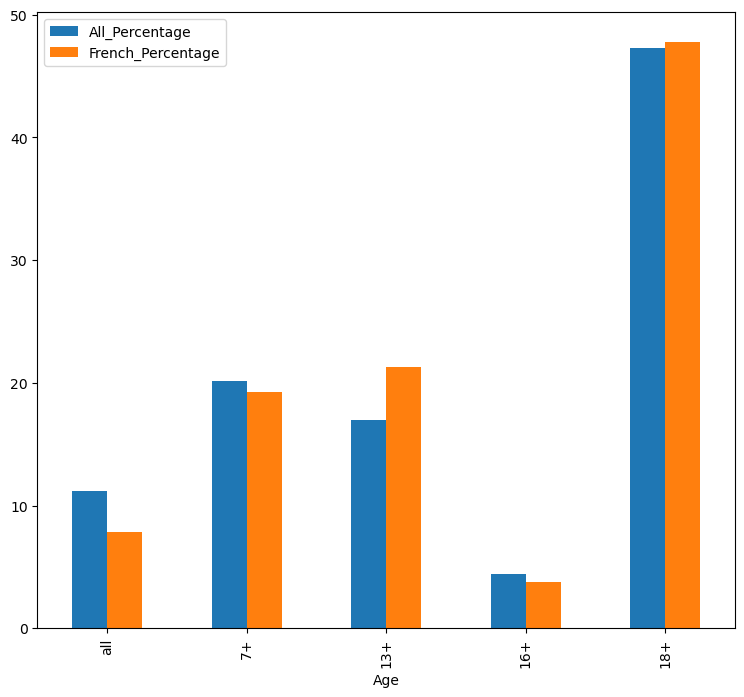

In [78]:
import matplotlib.pyplot as plt

#plot each series

combined.plot(x="Age", y=["All_Percentage", "French_Percentage"], kind="bar", figsize=(9, 8))
 
# print bar graph
plt.show()

In [79]:
# From the plot above we can see the distributions are very similar.
# Perhaps Canopy should look at scaling up to make more movies available in French. 717 out of 15069 movies.

So far we have addressed two of the three intial business goals for Canopy:

- offer curated selections of best rated French-language movies from the existing content
- make French-language movies available to various age groups

Leaving us to consider how we might:
- identify the least tapped genres so as to provide the filmmakers with data to make original content for Canopy.

My idea for tackling this problem is to sum the values of the streaming services columns, resulting in values from 0 to 4.
0 if the movie is not available on any of the 4 platforms, up to
4 if the movie is available on all 4 of the providers listed: 

In [80]:
# Netflix, Hulu, Prime Video, Disney+
streamers.head()

,ID,Title,Netflix,Hulu,Prime Video,Disney+
0,13825,The Jungle Book: Search for the Lost Treasure,0,0,1,0
1,15943,Vellaiya Irukiravan Poi Solla Maatan,0,0,1,0
2,6233,Hollows Grove,0,0,1,0
3,16194,Web of the Spider,0,0,1,0
4,7870,Life in Danger,0,0,1,0


In [81]:
# We can then look at grouping the movies by score and looking at the distribution of genres within each score group.
# For this we will consider the dataset of all movies to look at what the 4 streaming services are offering their subscribers.
# We will still need to consider the data with the Genres column exploded to allow us to group by individual genres.
df1

,Title,Year,Age,IMDb,Rotten Tomatoes,Genres,Language,Runtime,Netflix,Hulu,Prime Video,Disney+
0,Trigger Pals,1939,NaN,5.3,NaN,Action,English,59.0,0.0,0.0,1.0,0.0
0,Trigger Pals,1939,NaN,5.3,NaN,Adventure,English,59.0,0.0,0.0,1.0,0.0
0,Trigger Pals,1939,NaN,5.3,NaN,Western,English,59.0,0.0,0.0,1.0,0.0
1,One Way Astronaut: The Mars One Initiative,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Open Grave,2013,18+,6.2,18%,Horror,English,102.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
15067,Fanney Khan,2018,NaN,4.5,63%,Drama,NaN,130.0,0.0,0.0,1.0,0.0
15067,Fanney Khan,2018,NaN,4.5,63%,Music,NaN,130.0,0.0,0.0,1.0,0.0
15068,Off Label,2013,NaN,5.2,50%,Documentary,English,80.0,0.0,0.0,1.0,0.0
15068,Off Label,2013,NaN,5.2,50%,Drama,English,80.0,0.0,0.0,1.0,0.0


In [82]:
# remove rows that contain NaN om the streaming columns, if Netflix has Nan all services have NaN.

dfscore = df1.dropna(subset=['Netflix'])
dfscore

,Title,Year,Age,IMDb,Rotten Tomatoes,Genres,Language,Runtime,Netflix,Hulu,Prime Video,Disney+
0,Trigger Pals,1939,NaN,5.3,NaN,Action,English,59.0,0.0,0.0,1.0,0.0
0,Trigger Pals,1939,NaN,5.3,NaN,Adventure,English,59.0,0.0,0.0,1.0,0.0
0,Trigger Pals,1939,NaN,5.3,NaN,Western,English,59.0,0.0,0.0,1.0,0.0
2,Open Grave,2013,18+,6.2,18%,Horror,English,102.0,0.0,0.0,1.0,0.0
2,Open Grave,2013,18+,6.2,18%,Mystery,English,102.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
15067,Fanney Khan,2018,NaN,4.5,63%,Drama,NaN,130.0,0.0,0.0,1.0,0.0
15067,Fanney Khan,2018,NaN,4.5,63%,Music,NaN,130.0,0.0,0.0,1.0,0.0
15068,Off Label,2013,NaN,5.2,50%,Documentary,English,80.0,0.0,0.0,1.0,0.0
15068,Off Label,2013,NaN,5.2,50%,Drama,English,80.0,0.0,0.0,1.0,0.0


In [83]:
# Create a column that is the sum of the Streaming values for each row in the dataframe.
# df['new_column'] = df[['column1', 'column2', 'column3']].sum(axis=1)

dfscore['Stream Score'] = dfscore['Netflix'] + dfscore['Hulu'] + dfscore['Prime Video'] + dfscore['Disney+']

C:\Users\adamt\AppData\Local\Temp\ipykernel_9420\1471719371.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfscore['Stream Score'] = dfscore['Netflix'] + dfscore['Hulu'] + dfscore['Prime Video'] + dfscore['Disney+']


In [84]:
# I am not sure what the above warning means, The dataframe returns the desired result: 
# A new column called 'Stream Score' which indicates how many of the streaming services have the title available.

dfscore

,Title,Year,Age,IMDb,Rotten Tomatoes,Genres,Language,Runtime,Netflix,Hulu,Prime Video,Disney+,Stream Score
0,Trigger Pals,1939,NaN,5.3,NaN,Action,English,59.0,0.0,0.0,1.0,0.0,1.0
0,Trigger Pals,1939,NaN,5.3,NaN,Adventure,English,59.0,0.0,0.0,1.0,0.0,1.0
0,Trigger Pals,1939,NaN,5.3,NaN,Western,English,59.0,0.0,0.0,1.0,0.0,1.0
2,Open Grave,2013,18+,6.2,18%,Horror,English,102.0,0.0,0.0,1.0,0.0,1.0
2,Open Grave,2013,18+,6.2,18%,Mystery,English,102.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15067,Fanney Khan,2018,NaN,4.5,63%,Drama,NaN,130.0,0.0,0.0,1.0,0.0,1.0
15067,Fanney Khan,2018,NaN,4.5,63%,Music,NaN,130.0,0.0,0.0,1.0,0.0,1.0
15068,Off Label,2013,NaN,5.2,50%,Documentary,English,80.0,0.0,0.0,1.0,0.0,1.0
15068,Off Label,2013,NaN,5.2,50%,Drama,English,80.0,0.0,0.0,1.0,0.0,1.0


In [85]:
# review how many movies (exploded by genre as we are looking for untapped genres) are available on other streaming services:

dfscore.groupby(['Stream Score'])['Genres'].count()

Stream Score
1.0    30006
2.0     1255
3.0       18
Name: Genres, dtype: int64

In [86]:
dfscore.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31496 entries, 0 to 15068
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Title            31496 non-null  object 
 1   Year             31496 non-null  int64  
 2   Age              15367 non-null  object 
 3   IMDb             30752 non-null  float64
 4   Rotten Tomatoes  10959 non-null  object 
 5   Genres           31279 non-null  object 
 6   Language         30713 non-null  object 
 7   Runtime          30799 non-null  float64
 8   Netflix          31496 non-null  float64
 9   Hulu             31496 non-null  float64
 10  Prime Video      31496 non-null  float64
 11  Disney+          31496 non-null  float64
 12  Stream Score     31496 non-null  float64
dtypes: float64(7), int64(1), object(5)
memory usage: 3.4+ MB


In [87]:
# For movies that are streamed on 1 of the 4 services.

dfscore.loc[dfscore["Stream Score"] == 1.0].groupby(["Genres"])['Genres'].count()

Genres
Action         2025
Adventure      1359
Animation       565
Biography       627
Comedy         3518
Crime          1412
Documentary    2018
Drama          5524
Family         1172
Fantasy         852
Film-Noir        70
Game-Show         5
History         559
Horror         1713
Music           501
Musical         319
Mystery         977
News             79
Reality-TV       14
Romance        1807
Sci-Fi          933
Short           308
Sport           291
Talk-Show        10
Thriller       2558
War             405
Western         385
Name: Genres, dtype: int64

In [88]:
# For movies that are streamed on 2 of the 4 services.

dfscore.loc[dfscore["Stream Score"] == 2.0].groupby(["Genres"])['Genres'].count()

Genres
Action         105
Adventure       57
Animation       15
Biography       15
Comedy         177
Crime           73
Documentary     44
Drama          234
Family          43
Fantasy         41
History         17
Horror          58
Music           14
Musical         10
Mystery         53
News             2
Romance         83
Sci-Fi          31
Short            5
Sport           14
Talk-Show        1
Thriller       130
War             20
Western         13
Name: Genres, dtype: int64

In [89]:
# For movies that are streamed on 3 of the 4 services.

dfscore.loc[dfscore["Stream Score"] == 3.0].groupby(["Genres"])['Genres'].count()

Genres
Action       1
Adventure    2
Animation    1
Biography    1
Comedy       3
Drama        3
Family       1
Fantasy      2
Horror       1
Mystery      1
Romance      1
Western      1
Name: Genres, dtype: int64

In [90]:
genre_series = pd.Series(dfscore['Genres'])
genre_series

0             Action
0          Adventure
0            Western
2             Horror
2            Mystery
            ...     
15067          Drama
15067          Music
15068    Documentary
15068          Drama
15068        History
Name: Genres, Length: 31496, dtype: object

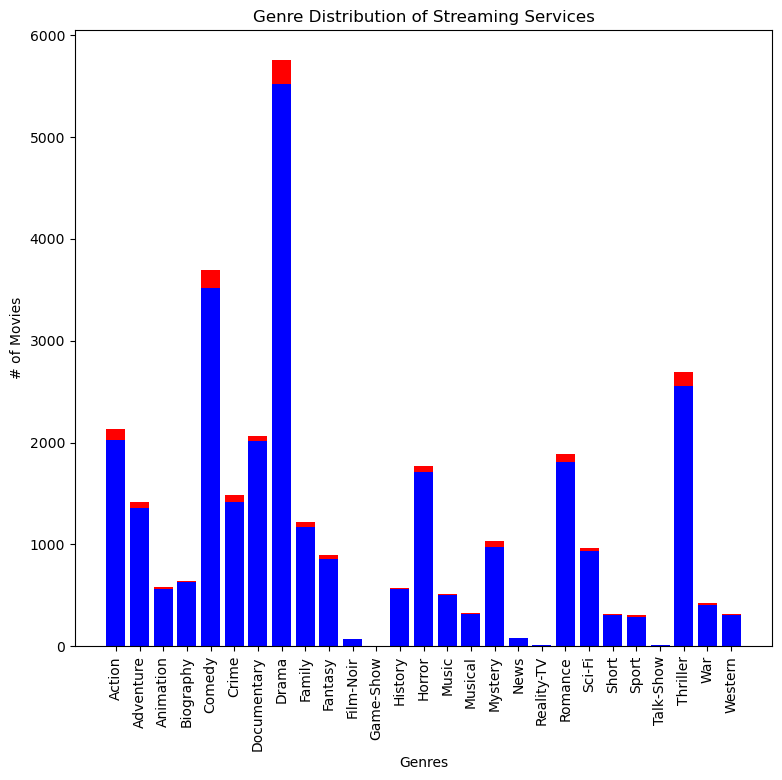

In [107]:
# https://www.geeksforgeeks.org/create-a-stacked-bar-plot-in-matplotlib/

x = ['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 
     'Film-Noir', 'Game-Show', 'History', 'Horror', 'Music', 'Musical', 'Mystery', 'News', 'Reality-TV', 'Romance', 
     'Sci-Fi', 'Short', 'Sport', 'Talk-Show', 'Thriller', 'War', 'Western']
score1 = np.array([2025,1359,565,627,3518,1412,2018,5524,1172,852,70,5,559,1713,501,319,977,79,14,1807,933,308,291,10,2558,405,305])
score2 = np.array([105,57,15,15,177,73,44,234,43,41,0,0,17,58,14,10,53,2,0,83,31,5,14,1,130,20,13])
score3 = np.array([1,2,1,1,3,0,0,3,1,2,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1])

plt.rcParams["figure.figsize"] = (9,8)
plt.bar(x, score1, color='b')
plt.bar(x, score2, bottom=score1, color='r')
plt.bar(x, score3, bottom=score1+score2, color='y')
plt.xlabel("Genres")
plt.xticks(x, rotation='vertical')
plt.ylabel("# of Movies")
plt.title('Genre Distribution of Streaming Services')
plt.show()
